<a href="https://colab.research.google.com/github/missattack/RedesComplexas/blob/main/RedesComplexas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Faça um programa em python para gerar uma rede livre de escala com eNe=1000 nós.
#Faça um gráfico mostrando os nós e as conexões. Nesse gráfico distribua os
#nós de modo que os nós com maior grau estejam mais próximos do centro.
#Evite que as conexões se sobreponham no gráfico.

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_scale_free_network(n_nodes=1000, m_edges=2):
    # Gerar uma rede livre de escala
    G = nx.barabasi_albert_graph(n_nodes, m_edges)

    # Obter o grau de cada nó
    degrees = dict(G.degree())

    # Criar um layout baseado na posição radial dos nós de acordo com o grau
    pos = nx.spring_layout(G, weight=None, iterations=100, seed=42)

    # Ajustar posições para que os hubs fiquem mais centralizados
    max_degree = max(degrees.values())
    node_sizes = [300 * (deg / max_degree) + 50 for deg in degrees.values()]
    node_colors = [deg for deg in degrees.values()]

    # Plotar a rede
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.viridis,
                           node_color=node_colors, alpha=0.8)

    plt.axis('off')
    plt.title("Rede Livre de Escala (Modelo de Barabási-Albert)")
    plt.show()



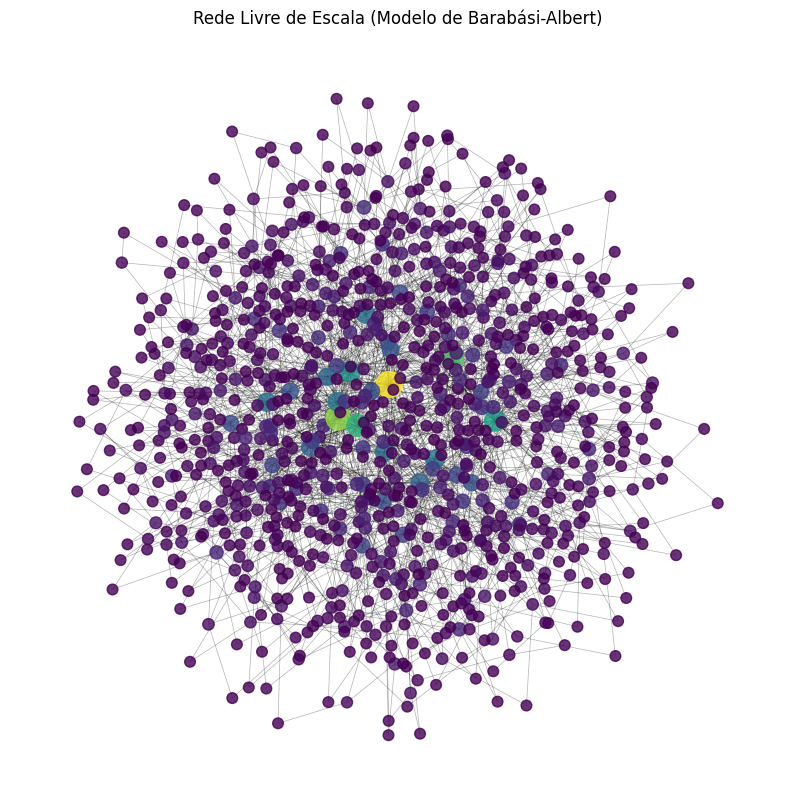

In [2]:
# Executar a função
plot_scale_free_network()

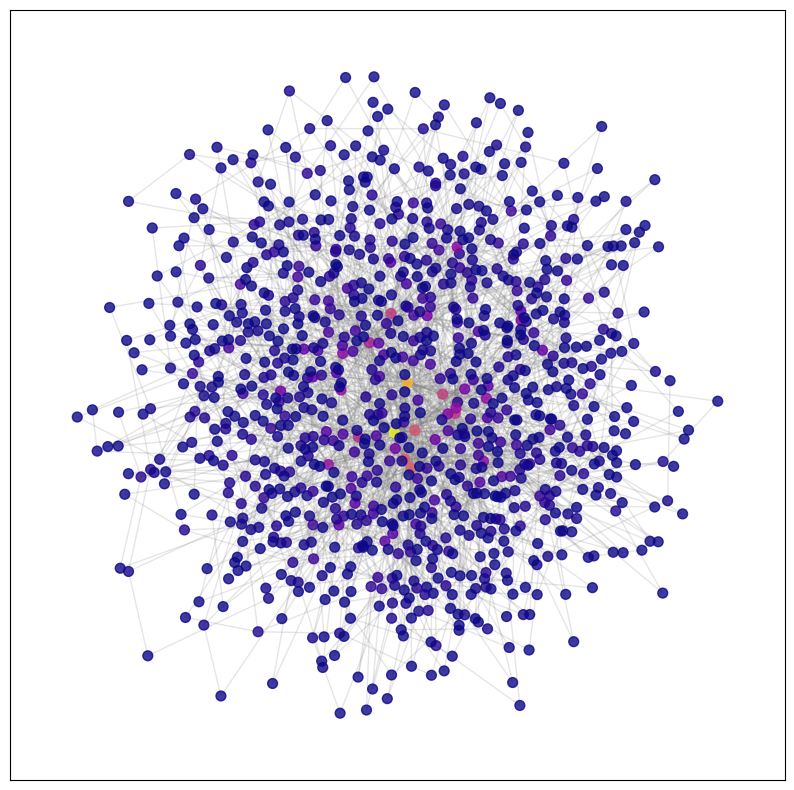

In [20]:
#Faça um programa em python para gerar uma rede livre de escala com eNe=1000 nós.
#Faça um gráfico mostrando os nós e as conexões. Nesse gráfico distribua os
#nós de modo que os nós com maior grau estejam mais próximos do centro.
#Evite que as conexões se sobreponham no gráfico.

# Parâmetros da rede
num_nodes = 1000  # Número de nós
m = 2  # Número de arestas a serem adicionadas por novo nó

# Gerar uma rede livre de escala usando o modelo de Barabási-Albert
G = nx.barabasi_albert_graph(num_nodes, m)

# Calcular o grau de cada nó
degrees = dict(G.degree())

# Definir a posição dos nós usando um layout que coloca nós com maior grau mais próximos do centro
pos = nx.spring_layout(G, k=0.15, iterations=50, seed=42)  # Ajuste 'k' e 'iterations' para evitar sobreposição

# Plotar a rede
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=list(degrees.values()), cmap=plt.cm.plasma, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')



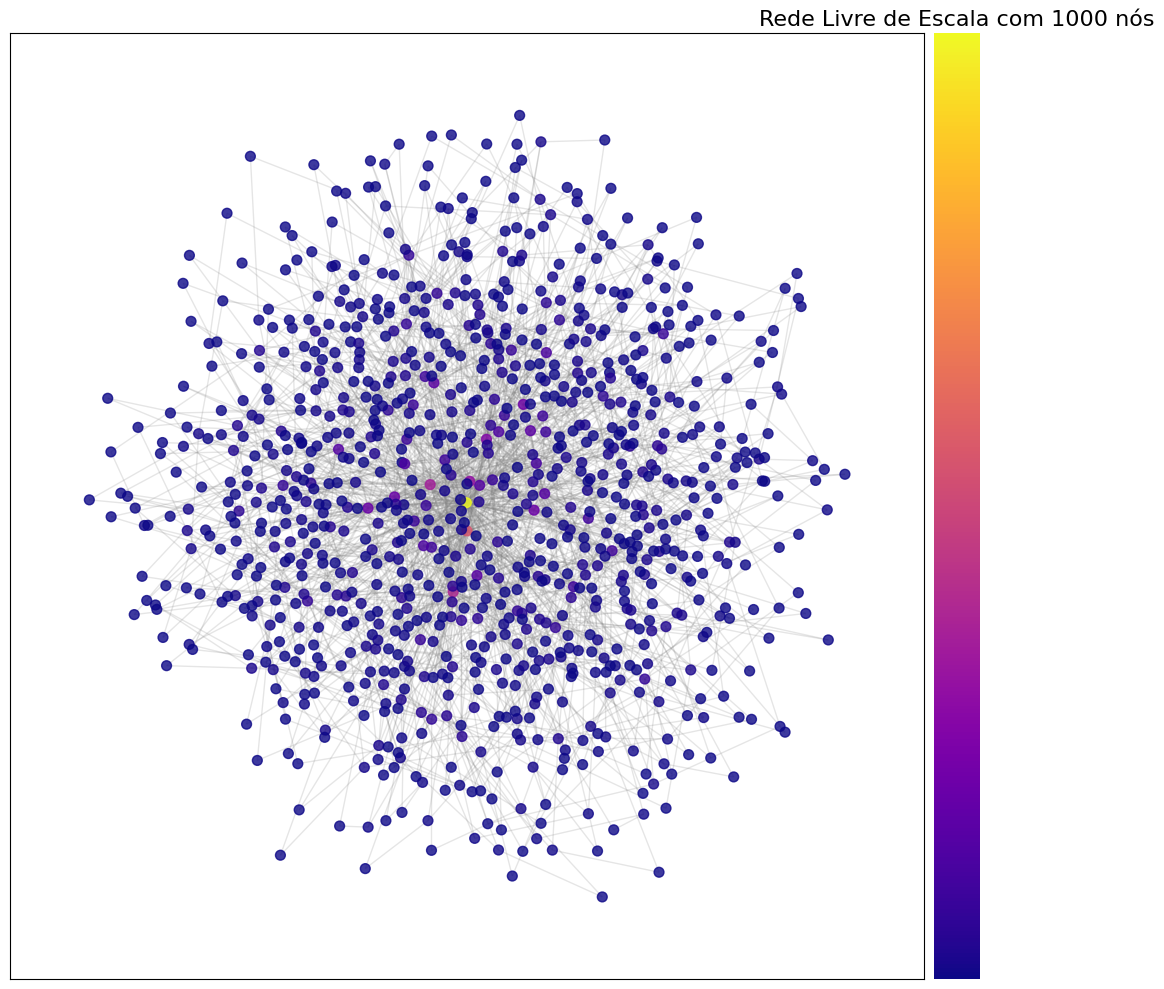

In [24]:
# Funcionou, mas coloque a colorbar fora do gráfico, para que a área plotável
# fique quadrada.

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Parâmetros da rede
num_nodes = 1000  # Número de nós
m = 2  # Número de arestas a serem adicionadas por novo nó

# Gerar uma rede livre de escala usando o modelo de Barabási-Albert
G = nx.barabasi_albert_graph(num_nodes, m)

# Calcular o grau de cada nó
degrees = dict(G.degree())

# Definir a posição dos nós usando um layout que coloca nós com maior grau mais próximos do centro
pos = nx.spring_layout(G, k=0.15, iterations=50, seed=42)  # Ajuste 'k' e 'iterations' para evitar sobreposição

# Plotar a rede
fig, ax = plt.subplots(figsize=(10, 10))  # Criar figura e eixo
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=list(degrees.values()), cmap=plt.cm.plasma, alpha=0.8, ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray', ax=ax)

# Adicionar uma barra de cores para indicar o grau dos nós
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values())))
sm.set_array([])

# Criar espaço para a barra de cores fora do gráfico
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Tamanho e posição da barra de cores
plt.colorbar(sm, cax=cax, label='Grau do nó')  # Adicionar a barra de cores

# Configurações do gráfico
plt.title(f"Rede Livre de Escala com {num_nodes} nós", fontsize=16)
plt.axis('off')  # Remover eixos
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()



In [25]:
# prompt
# Coloque o grafico da distribuição de graus em escala loglog
# (mantenha o log que já está em y e coloque também em x).
# Faça uma regressão linear do log(frequencia) x log(grau),
# retorne no prompt o coeficiente angular.

import numpy as np
from scipy.stats import linregress

# Definir parâmetros
n_nodes = 1000  # Número de nós na rede
m_edges = 2     # Número de arestas adicionadas a cada novo nó

def plot_network(G):
    """Plota a rede com os nós distribuídos de acordo com o grau."""
    degrees = dict(G.degree())
    pos = nx.spring_layout(G, weight=None, iterations=100, seed=42)

    max_degree = max(degrees.values())
    node_sizes = [300 * (deg / max_degree) + 50 for deg in degrees.values()]
    node_colors = [deg for deg in degrees.values()]

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.viridis,
                                   node_color=node_colors, alpha=0.8)

    # Adicionar colorbar corretamente associada ao gráfico
    plt.colorbar(nodes, label='Grau do Nó')

    plt.axis('off')
    plt.title("Rede Livre de Escala (Modelo de Barabási-Albert)")
    plt.show()




In [26]:
def plot_degree_distribution(G):
    """Plota a distribuição dos graus da rede em escala log-log e realiza regressão linear."""
    degrees = [deg for _, deg in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)

    log_degrees = np.log10(unique_degrees)
    log_counts = np.log10(counts)

    # Regressão linear no log-log
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)

    plt.figure(figsize=(8, 6))
    plt.scatter(log_degrees, log_counts, color='b', alpha=0.7, edgecolor='black', label='Dados')
    plt.plot(log_degrees, slope * log_degrees + intercept, color='r', linestyle='dashed', label=f'Regressão Linear (slope={slope:.2f})')

    plt.xlabel("log(Grau)")
    plt.ylabel("log(Frequência)")
    plt.title("Distribuição dos Graus da Rede (Escala Log-Log)")
    plt.legend()
    plt.show()

    return slope



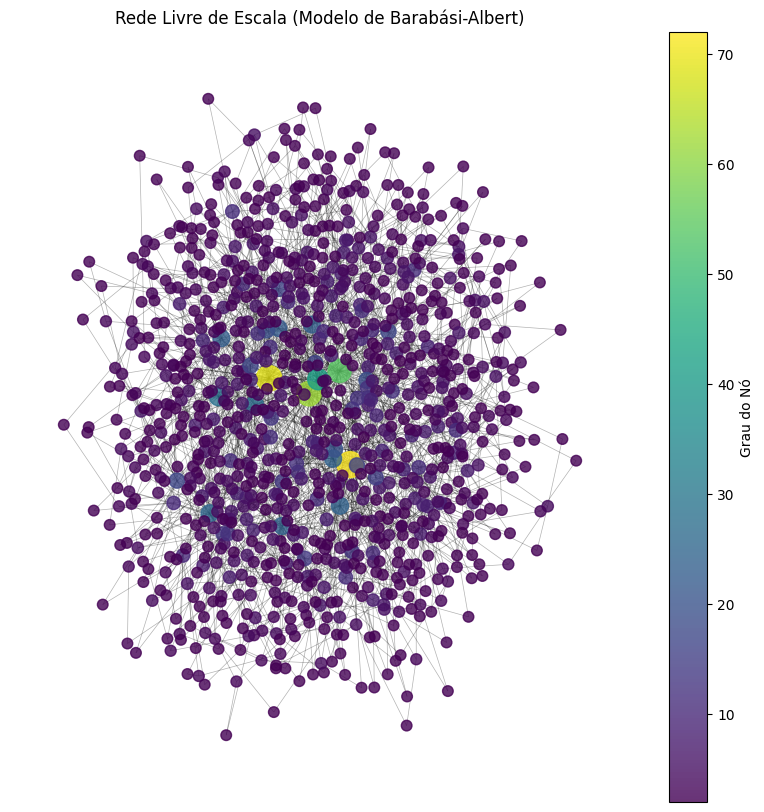

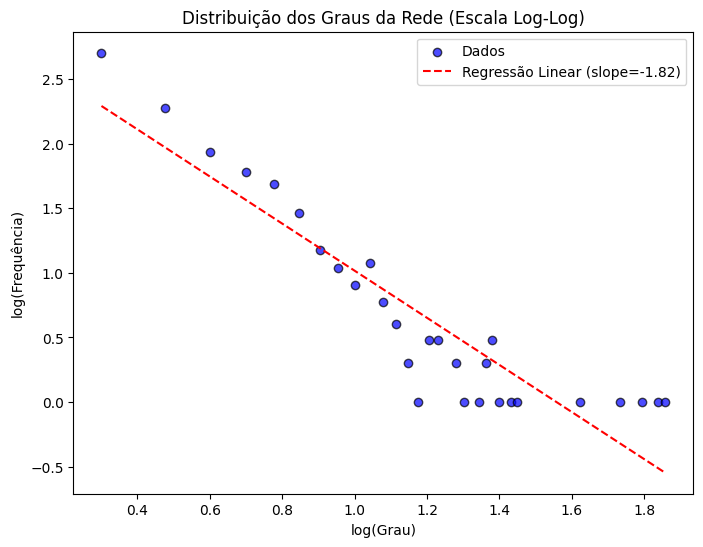

Coeficiente angular da regressão log-log: -1.82


In [27]:
# Gerar a rede livre de escala
G = nx.barabasi_albert_graph(n_nodes, m_edges)

# Plotar os gráficos
plot_network(G)
slope = plot_degree_distribution(G)

print(f"Coeficiente angular da regressão log-log: {slope:.2f}")

In [28]:
# prompt
# Reorganize o código da seguinte forma:
# -defina os parâmetros n_nodes=1000, m_edges=2 no início do programa, coloque comentários
# -gere a rede, G, no programa principal, depois de definir as funções
# -faça o gráfico numa função que tenha como parâmetro G
# -faça também uma função para plotar a distribuição dos graus dos nós

# prompt
# Não é possível ler a escala  do color bar, corrija.
# Coloque o título do gráfico de plot_network no centro superior
# da figura da direita.

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Parâmetros da rede
n_nodes = 1000  # Número de nós na rede
m_edges = 2     # Número de arestas a serem adicionadas por novo nó

# Função para plotar a rede
def plot_network(G):
    """
    Plota a rede G com nós coloridos de acordo com o grau e uma barra de cores.
    Nós com maior grau são posicionados mais próximos do centro.
    """
    # Calcular o grau de cada nó
    degrees = dict(G.degree())

    # Definir a posição dos nós usando um layout que coloca nós com maior grau mais próximos do centro
    pos = nx.spring_layout(G, k=0.15, iterations=50, seed=42)

    # Plotar a rede
    fig, ax = plt.subplots(figsize=(10, 10))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=50, node_color=list(degrees.values()), cmap=plt.cm.plasma, alpha=0.8, ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray', ax=ax)

    # Adicionar uma barra de cores para indicar o grau dos nós
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values())))
    sm.set_array(list(degrees.values()))  # Corrigir a escala do colorbar

    # Criar espaço para a barra de cores fora do gráfico
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Grau do nó', fontsize=12)

    # Configurações do gráfico
    plt.title(f"Rede Livre de Escala com {n_nodes} nós", fontsize=16, y=1.05)  # Título centralizado na parte superior
    plt.axis('off')
    plt.tight_layout()
    plt.show()



In [29]:
# Função para plotar a distribuição dos graus dos nós
def plot_degree_distribution(G):
    """
    Plota a distribuição dos graus dos nós da rede G em escala log-log.
    """
    # Calcular a distribuição dos graus
    degrees = dict(G.degree())
    degree_values = list(degrees.values())
    degree_counts = nx.degree_histogram(G)

    # Plotar a distribuição dos graus em escala log-log
    plt.figure(figsize=(8, 6))
    plt.loglog(range(len(degree_counts)), degree_counts, 'bo', markersize=8)
    plt.title("Distribuição dos Graus dos Nós (Escala Log-Log)", fontsize=16)
    plt.xlabel("Grau do Nó", fontsize=14)
    plt.ylabel("Frequência", fontsize=14)
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()


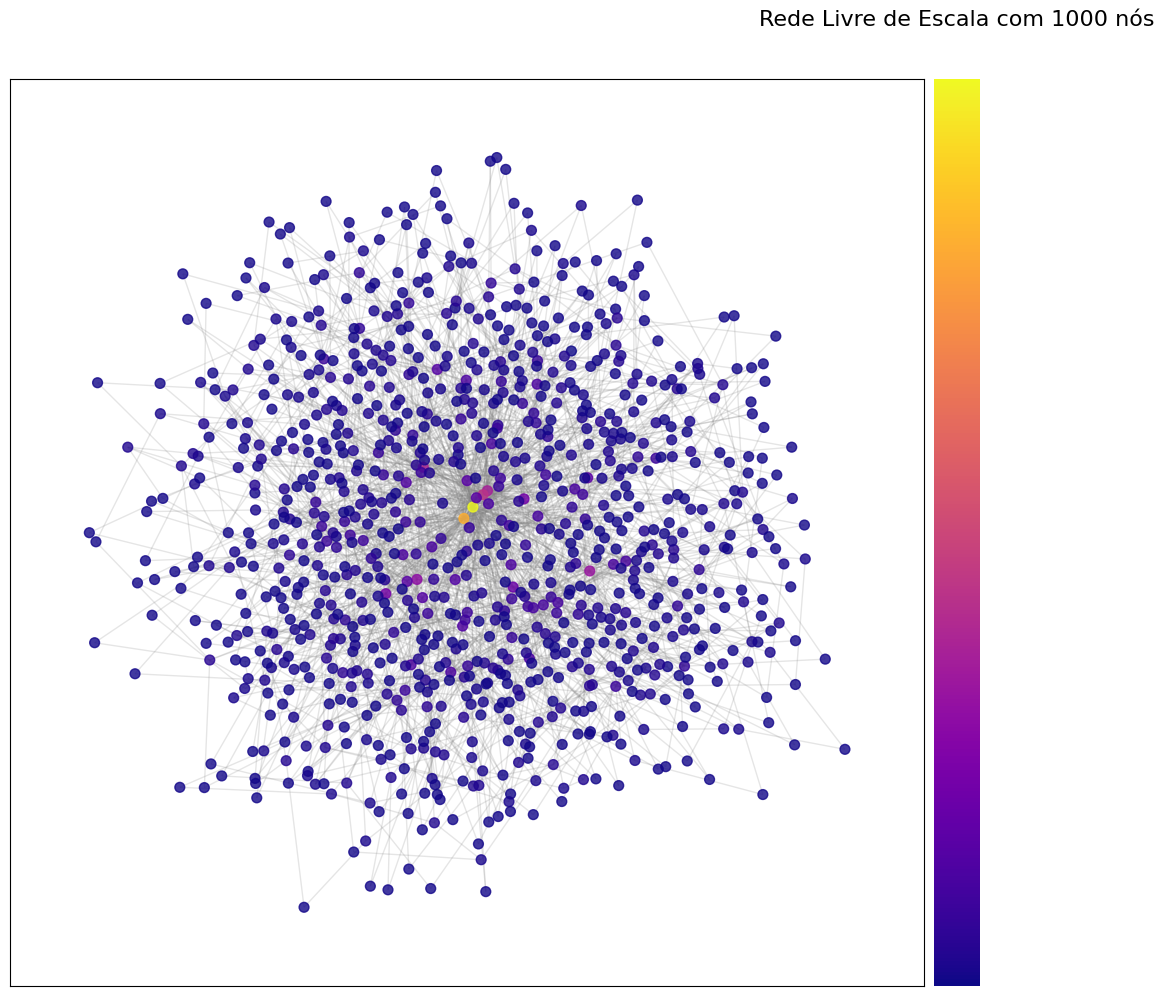

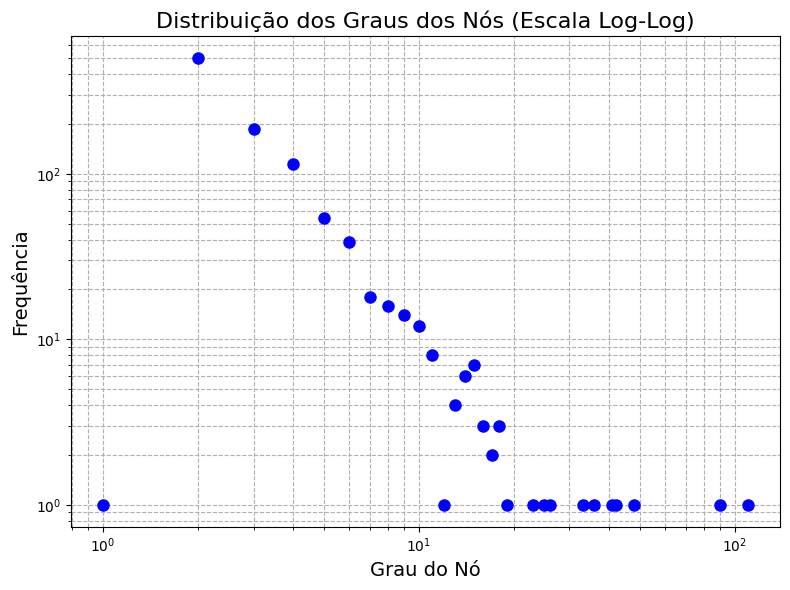

In [30]:
# Programa principal
if __name__ == "__main__":
    # Gerar a rede livre de escala usando o modelo de Barabási-Albert
    G = nx.barabasi_albert_graph(n_nodes, m_edges)

    # Plotar a rede
    plot_network(G)

    # Plotar a distribuição dos graus dos nós
    plot_degree_distribution(G)

In [31]:
# Mantenha os gráficos e funcionalidades atuais.
# Faça uma função para fazer o fitting e obter o coeficiente angular a
# partir da distribuição distribuição cumulativa da distribuição dos graus.

# Definir parâmetros
n_nodes = 1000  # Número de nós na rede
m_edges = 2     # Número de arestas adicionadas a cada novo nó

def plot_network(G):
    """Plota a rede com os nós distribuídos de acordo com o grau."""
    degrees = dict(G.degree())
    pos = nx.spring_layout(G, weight=None, iterations=100, seed=42)

    max_degree = max(degrees.values())
    node_sizes = [300 * (deg / max_degree) + 50 for deg in degrees.values()]
    node_colors = [deg for deg in degrees.values()]

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.viridis,
                                   node_color=node_colors, alpha=0.8)

    # Adicionar colorbar corretamente associada ao gráfico
    plt.colorbar(nodes, label='Grau do Nó')

    plt.axis('off')
    plt.title("Rede Livre de Escala (Modelo de Barabási-Albert)")
    plt.show()

def plot_degree_distribution(G):
    """Plota a distribuição dos graus da rede em escala log-log e realiza regressão linear."""
    degrees = [deg for _, deg in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)

    log_degrees = np.log10(unique_degrees)
    log_counts = np.log10(counts)

    # Regressão linear no log-log
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)

    plt.figure(figsize=(8, 6))
    plt.scatter(log_degrees, log_counts, color='b', alpha=0.7, edgecolor='black', label='Dados')
    plt.plot(log_degrees, slope * log_degrees + intercept, color='r', linestyle='dashed', label=f'Regressão Linear (slope={slope:.2f})')

    plt.xlabel("log(Grau)")
    plt.ylabel("log(Frequência)")
    plt.title("Distribuição dos Graus da Rede (Escala Log-Log)")
    plt.legend()
    plt.show()

    return slope

def fit_cumulative_degree_distribution(G):
    """Realiza o ajuste da distribuição cumulativa dos graus e retorna o coeficiente angular."""
    degrees = [deg for _, deg in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)
    cumulative_counts = np.cumsum(counts[::-1])[::-1]  # Distribuição cumulativa

    log_degrees = np.log10(unique_degrees)
    log_cumulative_counts = np.log10(cumulative_counts)

    # Regressão linear no log-log da distribuição cumulativa
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_cumulative_counts)

    plt.figure(figsize=(8, 6))
    plt.scatter(log_degrees, log_cumulative_counts, color='g', alpha=0.7, edgecolor='black', label='Dados')
    plt.plot(log_degrees, slope * log_degrees + intercept, color='r', linestyle='dashed', label=f'Regressão Linear (slope={slope:.2f})')

    plt.xlabel("log(Grau)")
    plt.ylabel("log(Frequência Cumulativa)")
    plt.title("Distribuição Cumulativa dos Graus (Escala Log-Log)")
    plt.legend()
    plt.show()

    return slope


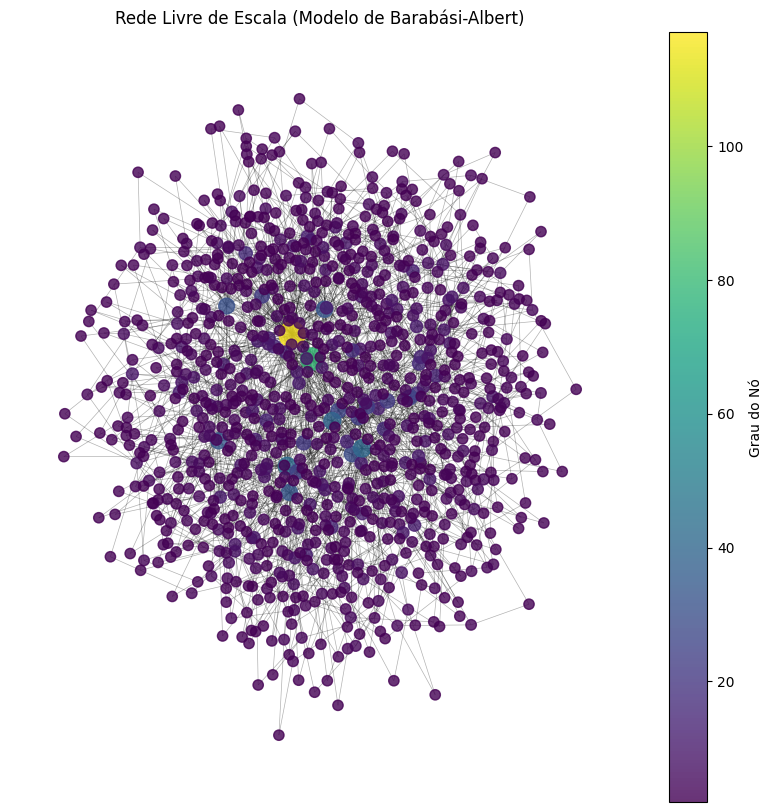

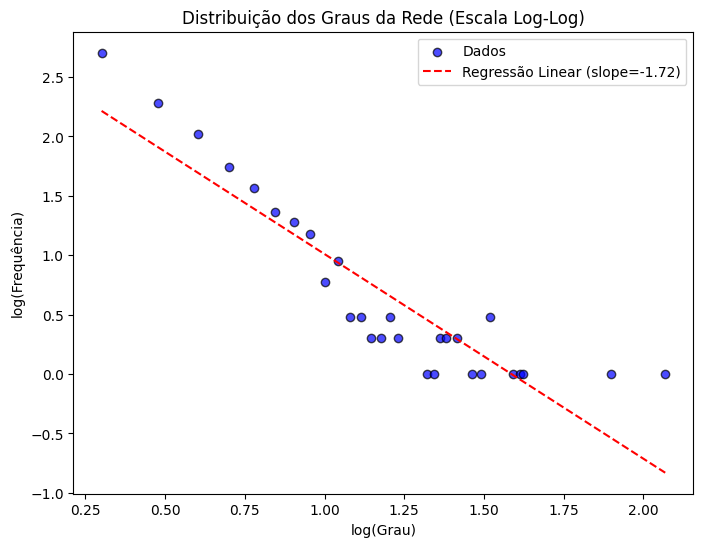

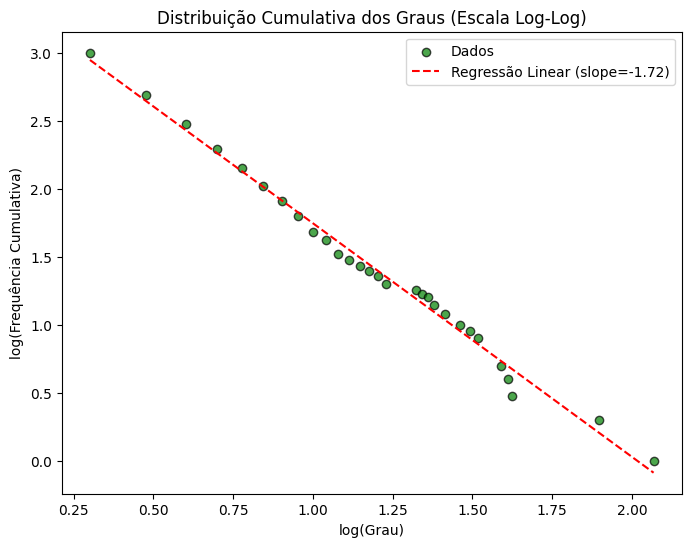

Coeficiente angular da regressão log-log: -1.72
Coeficiente angular da regressão log-log da distribuição cumulativa: -1.72


In [32]:
# Gerar a rede livre de escala
G = nx.barabasi_albert_graph(n_nodes, m_edges)

# Plotar os gráficos
plot_network(G)
slope = plot_degree_distribution(G)
cumulative_slope = fit_cumulative_degree_distribution(G)

print(f"Coeficiente angular da regressão log-log: {slope:.2f}")
print(f"Coeficiente angular da regressão log-log da distribuição cumulativa: {cumulative_slope:.2f}")

In [33]:
# Definir parâmetros
n_nodes = 1000  # Número de nós na rede
m_edges = 2     # Número de arestas adicionadas a cada novo nó

def gravitational_layout(G, scaling_factor=10):
    """Calcula um layout baseado em um modelo gravitacional."""
    pos = nx.spring_layout(G, weight=None, iterations=100, seed=42)
    degrees = np.array([deg for _, deg in G.degree()])
    center = np.array([0.5, 0.5])  # Centro da figura

    for node in G.nodes():
        displacement = center - pos[node]
        norm = np.linalg.norm(displacement)
        if norm > 0:
            pos[node] += scaling_factor * (degrees[node] / max(degrees)) * displacement / norm

    return pos

def plot_network(G):
    """Plota a rede com os nós distribuídos de acordo com um modelo gravitacional."""
    degrees = dict(G.degree())
    pos = gravitational_layout(G)

    max_degree = max(degrees.values())
    node_sizes = [300 * (deg / max_degree) + 50 for deg in degrees.values()]
    node_colors = [deg for deg in degrees.values()]

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.viridis,
                                   node_color=node_colors, alpha=0.8)

    # Adicionar colorbar corretamente associada ao gráfico
    plt.colorbar(nodes, label='Grau do Nó')

    plt.axis('off')
    plt.title("Rede Livre de Escala (Modelo de Barabási-Albert)")
    plt.show()

def plot_degree_distribution(G):
    """Plota a distribuição dos graus da rede em escala log-log e realiza regressão linear."""
    degrees = [deg for _, deg in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)

    log_degrees = np.log10(unique_degrees)
    log_counts = np.log10(counts)

    # Regressão linear no log-log
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)

    plt.figure(figsize=(8, 6))
    plt.scatter(log_degrees, log_counts, color='b', alpha=0.7, edgecolor='black', label='Dados')
    plt.plot(log_degrees, slope * log_degrees + intercept, color='r', linestyle='dashed', label=f'Regressão Linear (slope={slope:.2f})')

    plt.xlabel("log(Grau)")
    plt.ylabel("log(Frequência)")
    plt.title("Distribuição dos Graus da Rede (Escala Log-Log)")
    plt.legend()
    plt.show()

    return slope

def fit_cumulative_degree_distribution(G):
    """Realiza o ajuste da distribuição cumulativa dos graus e retorna o coeficiente angular."""
    degrees = [deg for _, deg in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)
    cumulative_counts = np.cumsum(counts[::-1])[::-1]  # Distribuição cumulativa

    log_degrees = np.log10(unique_degrees)
    log_cumulative_counts = np.log10(cumulative_counts)

    # Regressão linear no log-log da distribuição cumulativa
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_cumulative_counts)

    plt.figure(figsize=(8, 6))
    plt.scatter(log_degrees, log_cumulative_counts, color='g', alpha=0.7, edgecolor='black', label='Dados')
    plt.plot(log_degrees, slope * log_degrees + intercept, color='r', linestyle='dashed', label=f'Regressão Linear (slope={slope:.2f})')

    plt.xlabel("log(Grau)")
    plt.ylabel("log(Frequência Cumulativa)")
    plt.title("Distribuição Cumulativa dos Graus (Escala Log-Log)")
    plt.legend()
    plt.show()

    return slope



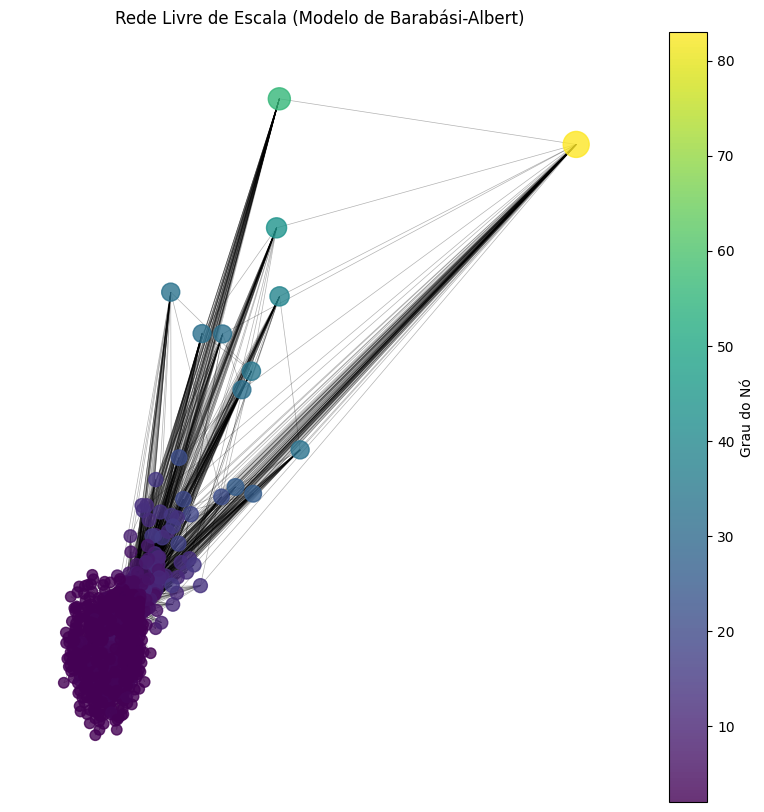

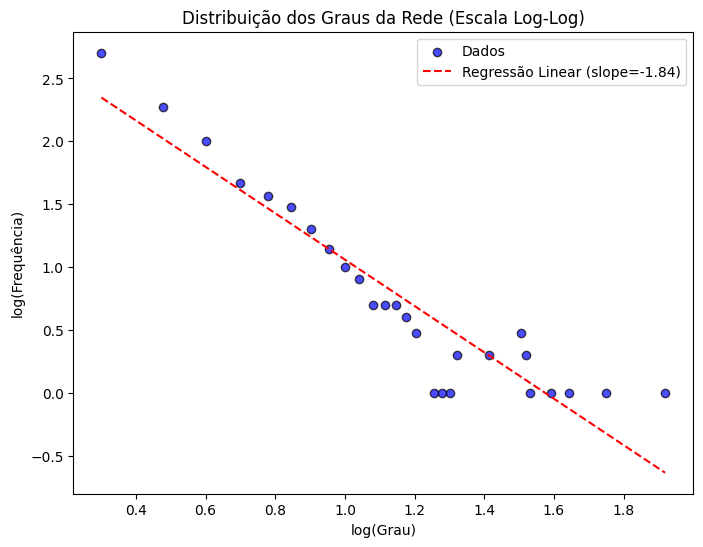

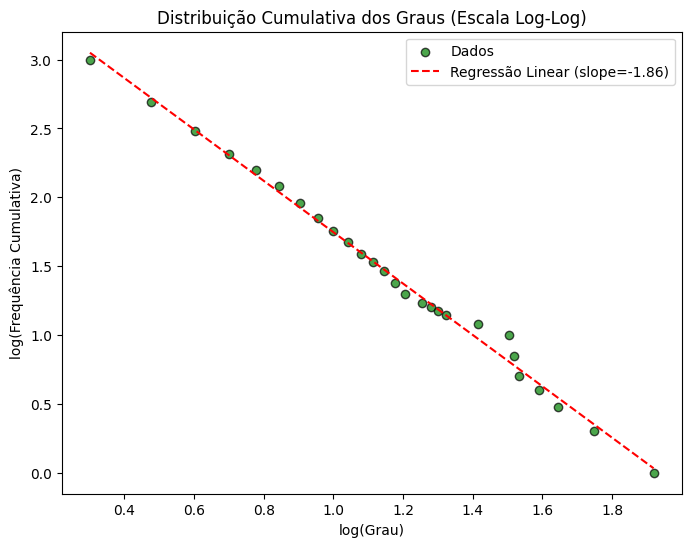

Coeficiente angular da regressão log-log: -1.84
Coeficiente angular da regressão log-log da distribuição cumulativa: -1.86


In [34]:
# Gerar a rede livre de escala
G = nx.barabasi_albert_graph(n_nodes, m_edges)

# Plotar os gráficos
plot_network(G)
slope = plot_degree_distribution(G)
cumulative_slope = fit_cumulative_degree_distribution(G)

print(f"Coeficiente angular da regressão log-log: {slope:.2f}")
print(f"Coeficiente angular da regressão log-log da distribuição cumulativa: {cumulative_slope:.2f}")

In [35]:
# Definir parâmetros
n_nodes = 1000  # Número de nós na rede
m_edges = 2     # Número de arestas adicionadas a cada novo nó

def gravitational_layout(G, scaling_factor=5):
    """Calcula um layout baseado em um modelo gravitacional."""
    pos = nx.spring_layout(G, weight=None, iterations=100, seed=42)
    degrees = np.array([deg for _, deg in G.degree()])
    center = np.array([0.5, 0.5])  # Centro da figura

    for node in G.nodes():
        displacement = center - pos[node]
        norm = np.linalg.norm(displacement)
        if norm > 0:
            #pos[node] += scaling_factor * 1.0 / (degrees[node] / max(degrees)) * displacement / norm
            pos[node] += scaling_factor * (degrees[node] / max(degrees)) * displacement / norm
    return pos

def plot_network(G):
    """Plota a rede com os nós distribuídos de acordo com um modelo gravitacional."""
    degrees = dict(G.degree())
    pos = gravitational_layout(G)

    max_degree = max(degrees.values())
    node_sizes = [300 * (deg / max_degree) + 50 for deg in degrees.values()]
    node_colors = [deg for deg in degrees.values()]

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.viridis,
                                   node_color=node_colors, alpha=0.8)

    # Adicionar colorbar corretamente associada ao gráfico
    plt.colorbar(nodes, label='Grau do Nó')

    plt.axis('off')
    plt.title("Rede Livre de Escala (Modelo de Barabási-Albert)")
    plt.show()


In [36]:
def plot_degree_distribution(G):
    """Plota a distribuição dos graus da rede em escala log-log e realiza regressão linear."""
    degrees = [deg for _, deg in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)

    log_degrees = np.log10(unique_degrees)
    log_counts = np.log10(counts)

    # Regressão linear no log-log
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)

    plt.figure(figsize=(8, 6))
    plt.scatter(log_degrees, log_counts, color='b', alpha=0.7, edgecolor='black', label='Dados')
    plt.plot(log_degrees, slope * log_degrees + intercept, color='r', linestyle='dashed', label=f'Regressão Linear (slope={slope:.2f})')

    plt.xlabel("log(Grau)")
    plt.ylabel("log(Frequência)")
    plt.title("Distribuição dos Graus da Rede (Escala Log-Log)")
    plt.legend()
    plt.show()

    return slope



In [37]:
def fit_cumulative_degree_distribution(G):
    """Realiza o ajuste da distribuição cumulativa dos graus e retorna o coeficiente angular."""
    degrees = [deg for _, deg in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)
    cumulative_counts = np.cumsum(counts[::-1])[::-1]  # Distribuição cumulativa

    log_degrees = np.log10(unique_degrees)
    log_cumulative_counts = np.log10(cumulative_counts)

    # Regressão linear no log-log da distribuição cumulativa
    slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_cumulative_counts)

    plt.figure(figsize=(8, 6))
    plt.scatter(log_degrees, log_cumulative_counts, color='g', alpha=0.7, edgecolor='black', label='Dados')
    plt.plot(log_degrees, slope * log_degrees + intercept, color='r', linestyle='dashed', label=f'Regressão Linear (slope={slope:.2f})')

    plt.xlabel("log(Grau)")
    plt.ylabel("log(Frequência Cumulativa)")
    plt.title("Distribuição Cumulativa dos Graus (Escala Log-Log)")
    plt.legend()
    plt.show()

    return slope



In [38]:
def network_metrics(G):
    """Calcula e exibe métricas da rede, como distância mínima média e clustering médio."""
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    avg_clustering = nx.average_clustering(G)

    print(f"Distância mínima média: {avg_shortest_path_length:.4f}")
    print(f"Coeficiente de clustering médio: {avg_clustering:.4f}")

    return avg_shortest_path_length, avg_clustering



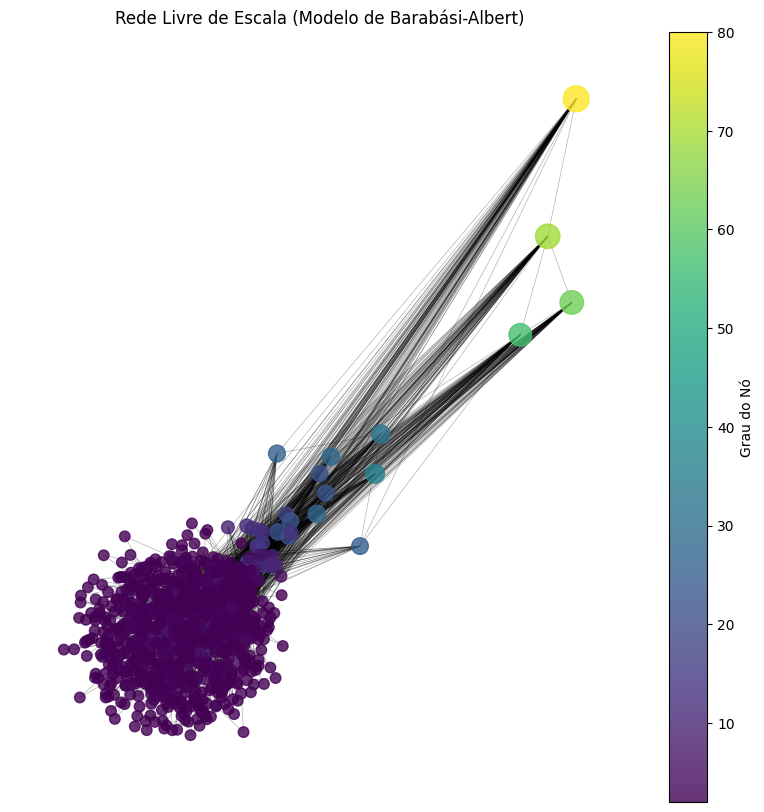

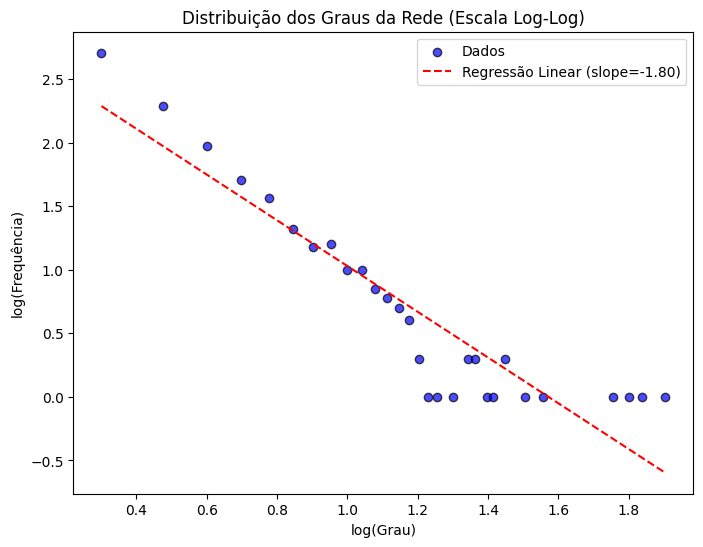

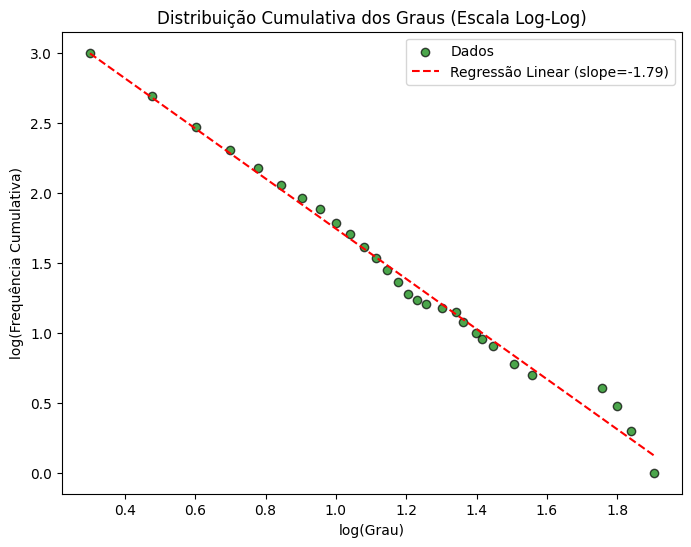

Distância mínima média: 4.0319
Coeficiente de clustering médio: 0.0311
Coeficiente angular da regressão log-log: -1.80
Coeficiente angular da regressão log-log da distribuição cumulativa: -1.79


In [39]:
# Gerar a rede livre de escala
G = nx.barabasi_albert_graph(n_nodes, m_edges)

# Plotar os gráficos
plot_network(G)
slope = plot_degree_distribution(G)
cumulative_slope = fit_cumulative_degree_distribution(G)
avg_path_length, avg_clustering = network_metrics(G)

print(f"Coeficiente angular da regressão log-log: {slope:.2f}")
print(f"Coeficiente angular da regressão log-log da distribuição cumulativa: {cumulative_slope:.2f}")